# Global Power Plant Database Exploration


University of Denver Partners: Jesse St. John, Thomas Beadle

Silesian University of Technology Partners: Marta Daszkiewicz, Ola, Konrad, Bartek

## About the Data

The Global Power Plant Database is an open-source, open-access dataset of grid-scale (1 MW and greater) electricity generating facilities operating across the world. This database was created by World Resources Institute (WRI) personel and other experts by gathering data from government and independent sources to represent about 72% of the world's capacity.

More information on how the data was gathered and compiled can be found within the 'data' folder on our github repository from the authors at https://github.com/jlstjohn/coil_project.

Population data is gathered from The World Bank Open Data. "Total population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are midyear estimates." To read more about this dataset including sources and methodology, please visit https://data.worldbank.org/indicator/SP.POP.TOTL?end=2022&start=1989.

The Human Development Index (HDI) is an open-access dataset developed by the United Nations Development Programme as "...a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions." To read more about the methodology and calculations of HDI please visit https://hdr.undp.org/. 

## Motivation

As it has become more and more apparent that humans have a direct impact on climate change, the need for reliable and evironmentally sustainable power to support modern society has become a major focus of research. There have been exhaustive studies on how various types of fuel and their emissions impact their surrounding environment, studies on water availabilty and the effect building certain types of plants (like nuclear plants) in an area would affect water supply, and scientists are also researching hybrid plants (using more than one type of fuel to generate power).

## Research Question

Our research question that we initially set out to solve was: Where are there additional opportunities for renewable energy?

As we explored and dug into the data provided by this dataset, we found this question to be difficult to answer directly. This is partly due to the information provided by the dataset overall. The Global Power Plant Dataset seems more suited to questions geared towards questions involving amount of energy generation than exploring possible additional energy resources, although this is not a bad place to start to get an idea of the layout of current existing resources. The gaps in available data (as noted by the authors and data collectors) also hinder exploration into additional renewable resources.

Thus, we explored whether HDI and population had any correlation with renewable energy fuel source use by country. This was something we hadn't seen done elsewhere. We also looked at what other factors could impact where renewable opportunities could be explored from within the dataset.

## Brief Look at Fields in GPP Dataset

Fields:

	- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
	- `country_long` (text): longer form of the country designation
	- `name` (text): name or title of the power plant, generally in Romanized form
	- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
	- `capacity_mw` (number): electrical generating capacity in megawatts
	- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
	- `primary_fuel` (text): energy source used in primary electricity generation or export
	- `other_fuel1` (text): energy source used in electricity generation or export
	- `other_fuel2` (text): energy source used in electricity generation or export
	- `other_fuel3` (text): energy source used in electricity generation or export
	- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
	- `owner` (text): majority shareholder of the power plant, generally in Romanized form
	- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
	- `url` (text): web document corresponding to the `source` field
	- `geolocation_source` (text): attribution for geolocation information
	- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
	- `year_of_capacity_data` (number): year the capacity information was reported
	- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
	- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
	- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
	- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
	- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
	- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
	- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
	- `generation_data_source` (text): attribution for the reported generation information
	- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013 (see [2])
	- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 (see [2])
	- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 (see [2])
	- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 (see [2])
	- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 (see [2])
	- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013 (see section on this field below)
	- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 (see section on this field below)
	- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015 (see section on this field below)
	- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016 (see section on this field below)
	- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 (see section on this field below)

# Data Cleaning

Before performing any analysis on the data, it was important to look at and understand each field.

The following is taken from the README file:

- "Caveats: `primary_fuel` is the fuel that has been identified to provide the largest portion of generated electricity for the plant or has been identified as the primary fuel by the data source.
For power plants that have data in multiple `other_fuel` fields, the ordering of the fuels should not be taken to indicate any priority or preference of the fuel for operating the power plant or generating units.
Though the `other_fuel` columns in the database are numbered sequentially from 1, the ordering is insignificant."

Based off of this information, we will combine the three columns ('other_fuel1', 'other_fuel2', 'other_fuel3') into one column and evaluate renewable energy possiblities from there (in terms of additional locations). Main focus will be on the 'primary_fuel' column. Additionally, a column called 'is_renewable' will be created based off of the 'primary_fuel' column.

Columns deemed not needed for this exploration will be dropped.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
# import data
gpp_data = pd.read_csv('data/global_power_plant_database.csv')
gpp_data.head()

C:\Users\farrj\AppData\Local\Temp\ipykernel_32060\2146503083.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  gpp_data = pd.read_csv('data/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
# drop 18 uneccesary columns
remove_cols = ['name', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']
gpp_data.drop(columns= remove_cols, inplace= True)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# create 'other_fuel' column from 'other_fuel1', 'other_fuel2', and 'other_fuel3' columns
cols = ['other_fuel1', 'other_fuel2', 'other_fuel3']
gpp_data['other_fuel'] = gpp_data[cols].apply(lambda x: ', '.join(x.dropna().astype(str)), axis= 1)
gpp_data = gpp_data.drop(cols, axis= 1)

In [5]:
gpp_data.sample(10)

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel
21713,TUR,Turkey,WRI1018923,513.0,41.3391,35.0033,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4232,CAN,Canada,CAN0008124,8.5,44.4762,-79.7194,Solar,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5293,CHN,China,WRI1070735,660.0,38.3658,116.8168,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
29592,USA,United States of America,USA0003029,32.0,43.3558,-122.2494,Hydro,2019.0,123.888,140.861,123.550,134.067,174.923,124.864,114.477,
29786,USA,United States of America,USA0003927,810.0,46.5635,-118.5397,Hydro,2019.0,1697.014,2290.236,1640.095,1987.131,2767.576,2383.418,2240.943,
28426,USA,United States of America,USA0003491,1314.8,32.7283,-97.2192,Gas,2019.0,0.000,0.000,0.000,549.584,0.000,0.000,615.576,
19914,ZAF,South Africa,WRI1061293,5.2,-33.3173,18.2586,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
12820,DEU,Germany,WKS0068329,10.0,52.5280,13.9650,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
27945,USA,United States of America,USA0062161,9.9,43.1016,-89.3319,Wind,2019.0,NaN,NaN,NaN,NaN,NaN,19.597,21.419,
10303,FRA,France,WKS0069049,10.9,44.0680,4.3070,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [6]:
# look at types of fuel sources
gpp_data.primary_fuel.value_counts()

primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64

In [7]:
# create 'is_renewable' column
renewable_list = ['Hydro', 'Solar', 'Waste', 'Biomass', 'Wave and Tidal','Geothermal','Storage', 'Cogeneration','Wind']

def is_renewable(x, ren):
    return True if x in ren else False

gpp_data["is_renewable"] = gpp_data["primary_fuel"].apply(is_renewable, ren = renewable_list)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True


In [8]:
# create 'possible_renewable' column from 'other_fuel' column info
gpp_data["possible_renewable"] = gpp_data["other_fuel"].apply(is_renewable, ren = renewable_list)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable,possible_renewable
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False


Additionally, we need to check for null values in our dataset.

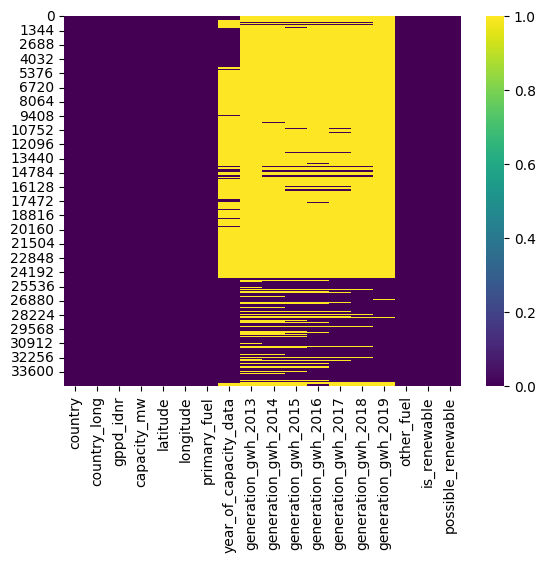

In [9]:
sns.heatmap(gpp_data.isnull(), cmap= 'viridis')
plt.show()

Due to the overwhelming amounts of missing data in the 'generation_gwh_*' columns, we will drop those as well.

The 'year_of_capacity_data' column will be kept as that information will be used later when pulling in population and HDI data. However, at this point in time it does not make sense to fill in the null values with anything else so they will remain NaN.

In [10]:
remove_cols = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']
gpp_data.drop(columns= remove_cols, inplace= True)
gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,other_fuel,is_renewable,possible_renewable
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,,True,False
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,,True,False
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,,True,False
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,,True,False
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,,True,False


In [11]:
gpp_data.dtypes

country                   object
country_long              object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
year_of_capacity_data    float64
other_fuel                object
is_renewable                bool
possible_renewable          bool
dtype: object

Now that our data is cleaned, we can begin exploring the dataset with some plots.

# Initial Data Analysis

We start by exploring a global plot of the dataset and the different types of primary fuel used by each.

C:\Users\farrj\AppData\Local\Temp\ipykernel_32060\3798247497.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


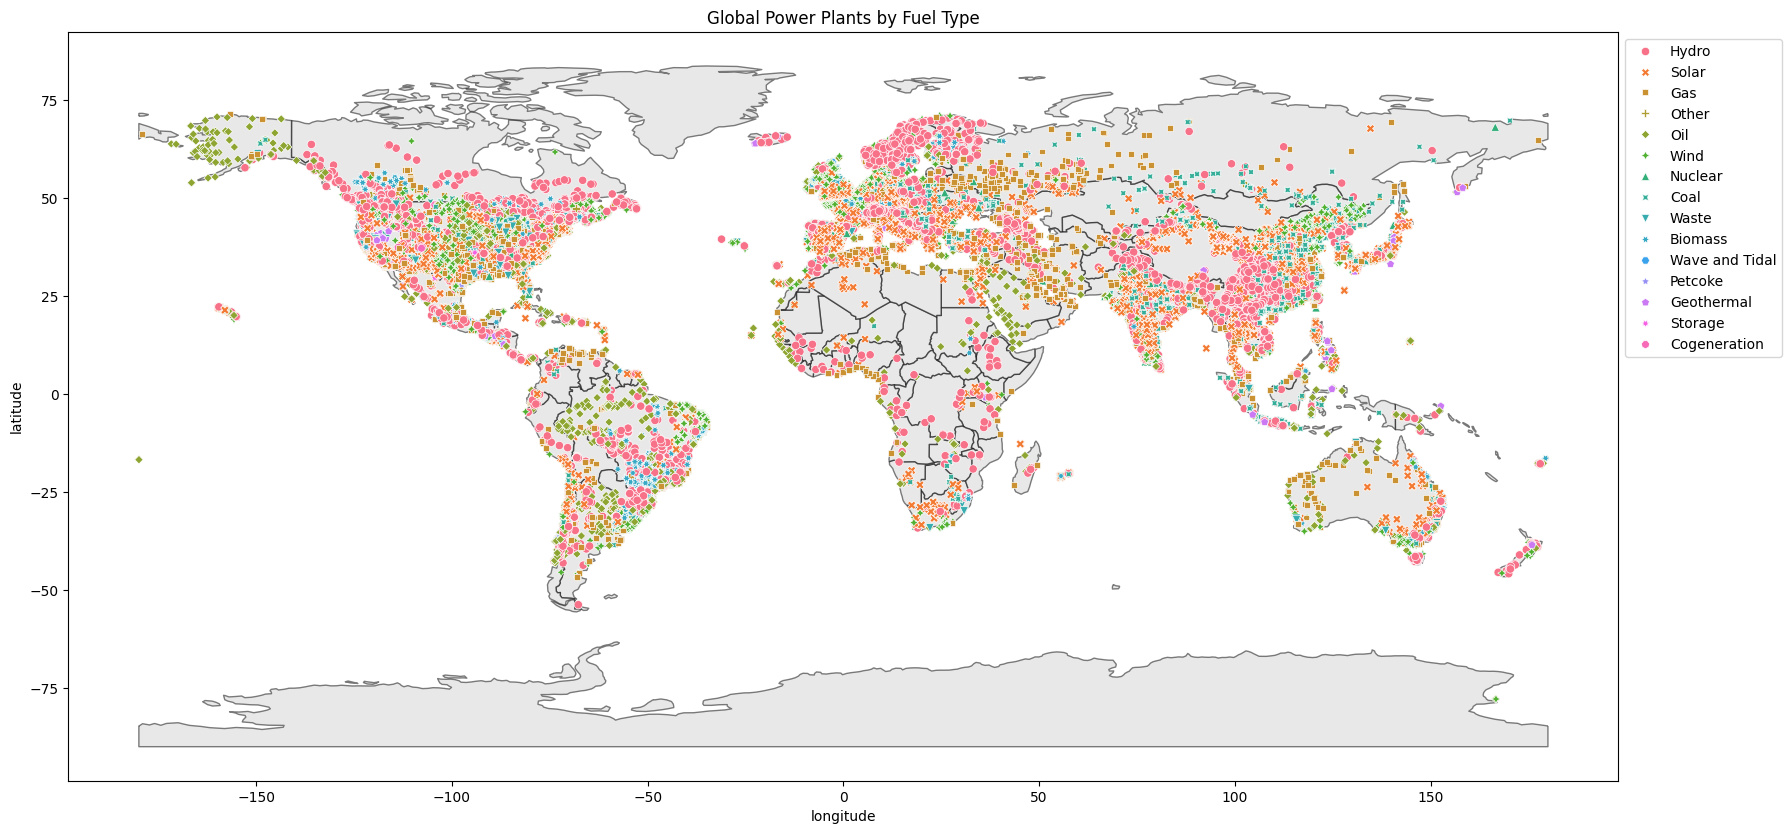

In [12]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)
sns.scatterplot(data=gpp_data, y="latitude",x="longitude", hue="primary_fuel", legend="auto", style="primary_fuel")
# sns.scatterplot(data=gpp_data, y="latitude",x="longitude", hue="is_renewable", legend="auto", style="primary_fuel")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Global Power Plants by Fuel Type')
plt.show()

As we can see above, a higher concentration of power plants tend to be located in more developed areas of the globe, especially around coastlines. It also appears that there is a high number of renewable plants in the world, however, the generation capacity is not reflected in the graph above.

To further explore this, we decided to pull in additional data on each county: 

## Population data and the Human Development Index.

Population data will be used to calculate each country's growth rate percentage from 2013-2019 (the years covered in the Global Power Plant Database).
All population data listed is in the thousands.

As a reminder: the Human Development Index (HDI) "is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and having a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions." (From https://hdr.undp.org/)

HDI has a value range of 0 to 1, with 1 being the best living conditions.

In [13]:
# pull in population data
popData = pd.read_csv("global_power_plant_project/API_SP.POP.TOTL_DS2_en_csv_v2_237218.csv", skiprows=range(4), low_memory=False)

# colum_names = list(data.columns)
popData = popData[["Country Name", 'Country Code', "Indicator Name", "Indicator Code", "2000", "2009",
                    "2010", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]]

# popData.head()
columns_to_check = ["2000", "2009", "2010", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
popData.dropna(subset=columns_to_check, how='all', inplace=True)
# popData.describe()

# check for null values
pd.isna(popData).sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              0
2009              0
2010              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
dtype: int64

In [14]:
#Calc Growth Rate from 2013-2019, years for which generation data is available
def growRate(p_0, p_t, t=7):
    rate = np.log(p_0/p_t) / t
    return rate*100

#growth rate calculated all for the same country from 2013-2019
popData['Growth_rate_%'] = growRate(popData['2013'], popData['2019'])

# popData['Growth_rate_%'].describe()
popData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2009,2010,2012,2013,2014,2015,2016,2017,2018,2019,Growth_rate_%
0,Aruba,ABW,"Population, total",SP.POP.TOTL,89101.0,99212.0,100341.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,-0.486243
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,401600588.0,509410477.0,523459657.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,-2.303182
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,19542982.0,27385307.0,28189672.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,-2.574385
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,269611898.0,346475221.0,356337762.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,-2.283114
4,Angola,AGO,"Population, total",SP.POP.TOTL,16394062.0,22507674.0,23364185.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,-3.042720


In [15]:
# Merge gpp_data with popData based on the "country" and "Country Code" columns
gpp_data = pd.merge(gpp_data, popData[['Country Code', 'Growth_rate_%']], left_on='country', right_on='Country Code', how='left')

gpp_data.drop(labels="Country Code", axis=1, inplace=True)

gpp_data.head()

,country,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,other_fuel,is_renewable,possible_renewable,Growth_rate_%
0,AFG,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,,True,False,-2.574385
1,AFG,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,,True,False,-2.574385
2,AFG,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,,True,False,-2.574385
3,AFG,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,,True,False,-2.574385
4,AFG,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,,True,False,-2.574385


In [16]:
#Pull in only necessary columns from HDI data
hdiColumns = ['iso3', 'country', 'hdi_2000', 'hdi_2009', 'hdi_2010', 'hdi_2012', 'hdi_2013', 
              'hdi_2014', 'hdi_2015', 'hdi_2016', 'hdi_2017', 'hdi_2018', 'hdi_2019'] 

hdiData = pd.read_csv("global_power_plant_project/HDR23-24_Composite_indices_complete_time_series.csv", usecols=hdiColumns, 
                      low_memory=False, encoding='latin-1')

hdiData.head()

,iso3,country,hdi_2000,hdi_2009,hdi_2010,hdi_2012,hdi_2013,hdi_2014,hdi_2015,hdi_2016,hdi_2017,hdi_2018,hdi_2019
0,AFG,Afghanistan,0.340,0.441,0.449,0.467,0.475,0.480,0.479,0.483,0.485,0.486,0.492
1,ALB,Albania,0.678,0.752,0.766,0.789,0.793,0.797,0.797,0.795,0.796,0.797,0.800
2,DZA,Algeria,0.652,0.716,0.721,0.726,0.729,0.732,0.736,0.738,0.738,0.740,0.742
3,AND,Andorra,0.815,0.859,0.863,0.867,0.851,0.854,0.856,0.859,0.860,0.863,0.865
4,AGO,Angola,0.380,0.506,0.516,0.545,0.555,0.565,0.591,0.595,0.597,0.598,0.597


Because the capacity data for each power plant data comes from different years, we want to make sure that we bring in the corresponding population and HDI data that matches each Country's data as closely as possible. First, let's check the number of values in the column "year_of_capacity_data":

In [17]:
# check values
gpp_data['year_of_capacity_data'].value_counts(dropna=False)

year_of_capacity_data
NaN       20049
2019.0    10281
2017.0     3371
2016.0      781
2015.0      281
2018.0       73
2000.0       58
2014.0       20
2013.0       14
2012.0        6
2009.0        1
2010.0        1
Name: count, dtype: int64

## Dealing with NaN values for Year of Capacity Data
 
We will take a weighted average of year of capacity data and MW capacity to find the approximate average year for each country then the HDI and Population data for that year. If a country has no information on year of capacity data, we will take an average of Population and HDI over the years that generation data is available (2013-2019). This way capacity, HDI, and Population will be approximately from the same point in time.

In [18]:
#Initialize NaN Country list for future reference, if needed
nanCountryList = []
#initialize dictionary to store data
countries = {country : None for country in set(gpp_data["country"])}

for country in countries.keys():
    #pull year and MW data for each country
    yearMW = gpp_data[['year_of_capacity_data', 'capacity_mw']].loc[gpp_data["country"] == country].dropna(subset=['year_of_capacity_data'])

    # pull in population and HDI data from weighted average of year & MW capacity
    if not yearMW.empty:
        yearAve = int(np.round(np.sum(yearMW['year_of_capacity_data']*yearMW['capacity_mw'])/np.sum(yearMW['capacity_mw'])))
        pop = popData[str(yearAve)].loc[popData["Country Code"] == country]
        hdindex = hdiData["hdi_"+str(yearAve)].loc[hdiData["iso3"] == country]

    #else if year data unavailable, take values of Population and HDI from 2013-2019
    else:
        yearAve = 2016 #average of 2013-2019
        pop = popData.iloc[:, 8:15].loc[popData["Country Code"] == country]
        hdindex = hdiData.iloc[:,6:13].loc[hdiData["iso3"] == country]
        nanCountryList.append(country)

    #update country dictionary with mean of HDI and Population
    countries[country] = {'HDI' : np.mean(hdindex), 'Data_year': yearAve, 'Population': np.mean(pop)}


tempDf = pd.DataFrame(countries).T

tempDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, NZL to BEN
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HDI         161 non-null    float64
 1   Data_year   167 non-null    float64
 2   Population  162 non-null    float64
dtypes: float64(3)
memory usage: 5.2+ KB


In [19]:
len(nanCountryList)

129

In [20]:
# merge new data (population, growth rate, HDI) with existing dataset
gpp_data = pd.merge(gpp_data, tempDf, left_on='country', right_index=True, how='left')


## Megawatt Generation by Country

With this new addition of data, we will now look at generation capacity and type by country. Note, capacity information is now by country, not by individual power plant.

In [21]:
# create a df with the desired information for easier plotting
capacities = {country : None for country in set(gpp_data["country"])}
for country in capacities.keys():
    swap = gpp_data["capacity_mw"].loc[gpp_data["country"] == country]
    population = gpp_data["Population"].loc[gpp_data["country"] == country]
    hdi = gpp_data["HDI"].loc[gpp_data["country"] == country]
    growth = gpp_data["Growth_rate_%"].loc[gpp_data["country"] == country]

    #note: growth rate is % 2013-2019
    capacities[country] = {"Capacity (MW)" : np.sum(swap), "Country" : country, "Population" : np.mean(population), 
                           "HDI": np.mean(hdi), "Growth Rate %": np.mean(growth)}

capacities = pd.DataFrame(capacities).T
capacities = capacities.sort_values(by="Capacity (MW)", ascending=False)
capacities.head()

,Capacity (MW),Country,Population,HDI,Growth Rate %
CHN,1415067.38,CHN,1387067142.857143,0.749,-0.458927
USA,1204638.05,USA,328329953.0,0.933,-0.544102
IND,316088.546,IND,1383112050.0,0.638,-0.983095
RUS,228220.05,RUS,144163826.857143,0.826429,-0.08924
JPN,215365.85,JPN,127050571.428571,0.913857,0.091311


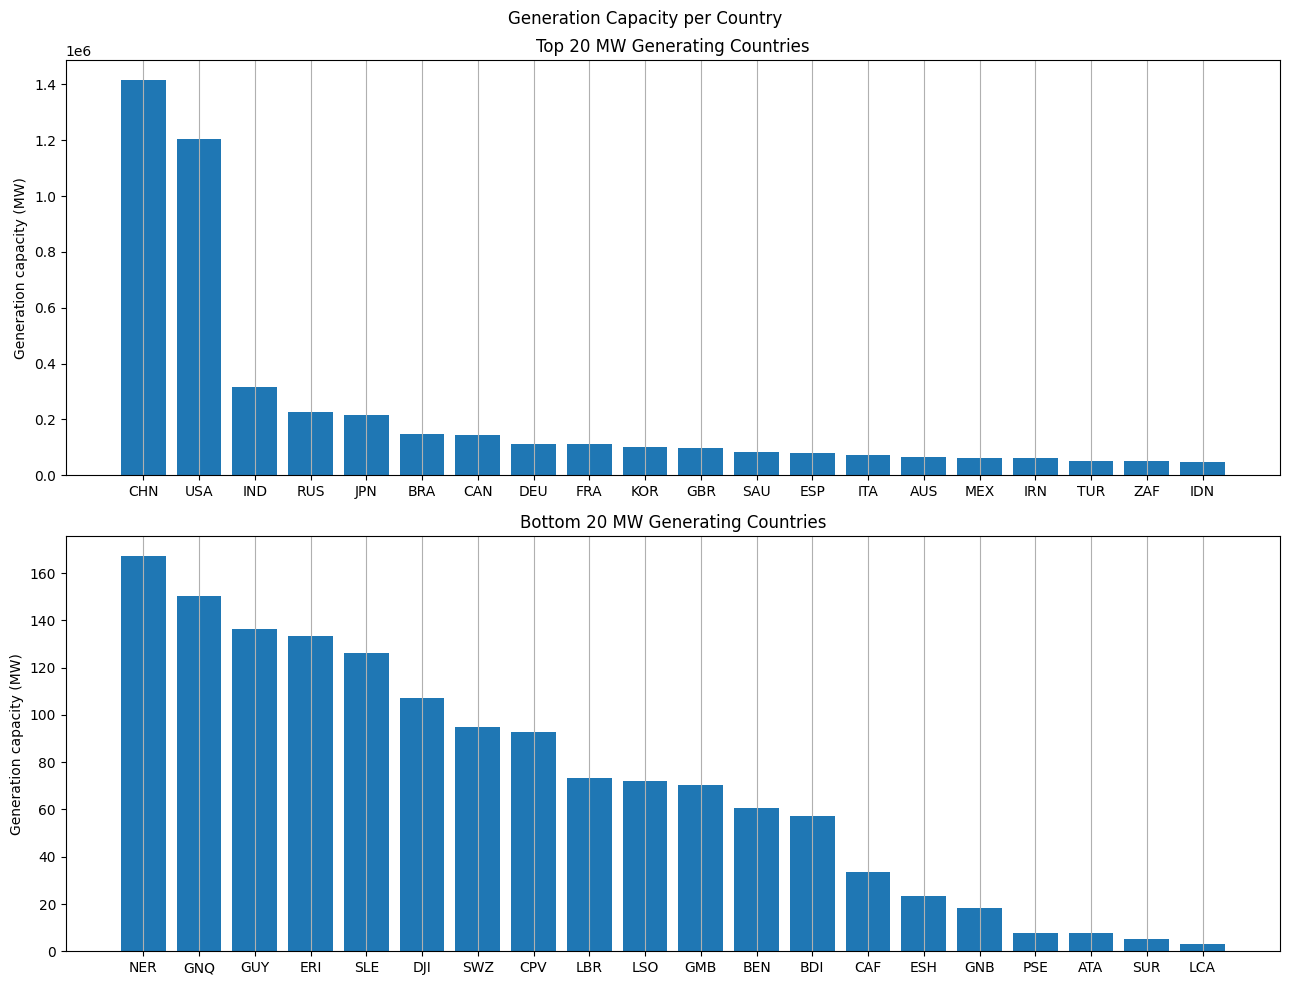

In [22]:
# We will only look at the top and bottom 20 producing countries
fig0, ax0 = plt.subplots(2, 1, figsize=(13, 10))
ax0[0].bar(capacities["Country"][:20], capacities["Capacity (MW)"][:20])
ax0[1].bar(capacities["Country"][-20:], capacities["Capacity (MW)"][-20:])

ax0[0].set_title("Top 20 MW Generating Countries")
ax0[1].set_title("Bottom 20 MW Generating Countries")

ax0[0].set_ylabel("Generation capacity (MW)")
ax0[1].set_ylabel("Generation capacity (MW)")

ax0[0].grid(which= 'major', axis= 'x')
ax0[1].grid(which= 'major', axis= 'x')



plt.suptitle('Generation Capacity per Country')
plt.tight_layout()
plt.show()

In [23]:
#get sum of MW generation of top two countries (CHN and US)
Top2MW = capacities[capacities['Country'].isin(["USA", "CHN"])]["Capacity (MW)"].sum()
#sum of next 37 and 38
remainingMW37 = capacities.iloc[2:39,:]["Capacity (MW)"].sum()
remainingMW38 = capacities.iloc[2:40,:]["Capacity (MW)"].sum()
#calculate and show difference
mwDiff37 = Top2MW - remainingMW37
mwDiff38 = Top2MW - remainingMW38

print(f"Differnce between US and China's MW generation and: \n Next 37 countries: {mwDiff37} \n Next 38 countries: {mwDiff38}")


Differnce between US and China's MW generation and: 
 Next 37 countries: 15674.264743000269 
 Next 38 countries: -1197.4352569999173


The bar chart above shows a drastic difference between USA and China and the rest of the world in terms of MW generation. These two countries have a combined MW generation that is more than the sum of the MW generation of the next top 37 countries combined. This indicates that while there may be ample opportunities for countries with smaller MW generation to switch their portfolio to renewable sources, that would only be a fraction of the total energey generated. Depending on current renewable portfolios, the US and China may be the two countries with the most opportunity to impact renewable MW generation on a world stage.

We now look at global plots of plant locations already utilizing renewable resources as their primary fuel vs. plants that do not.

C:\Users\farrj\AppData\Local\Temp\ipykernel_32060\4247222567.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


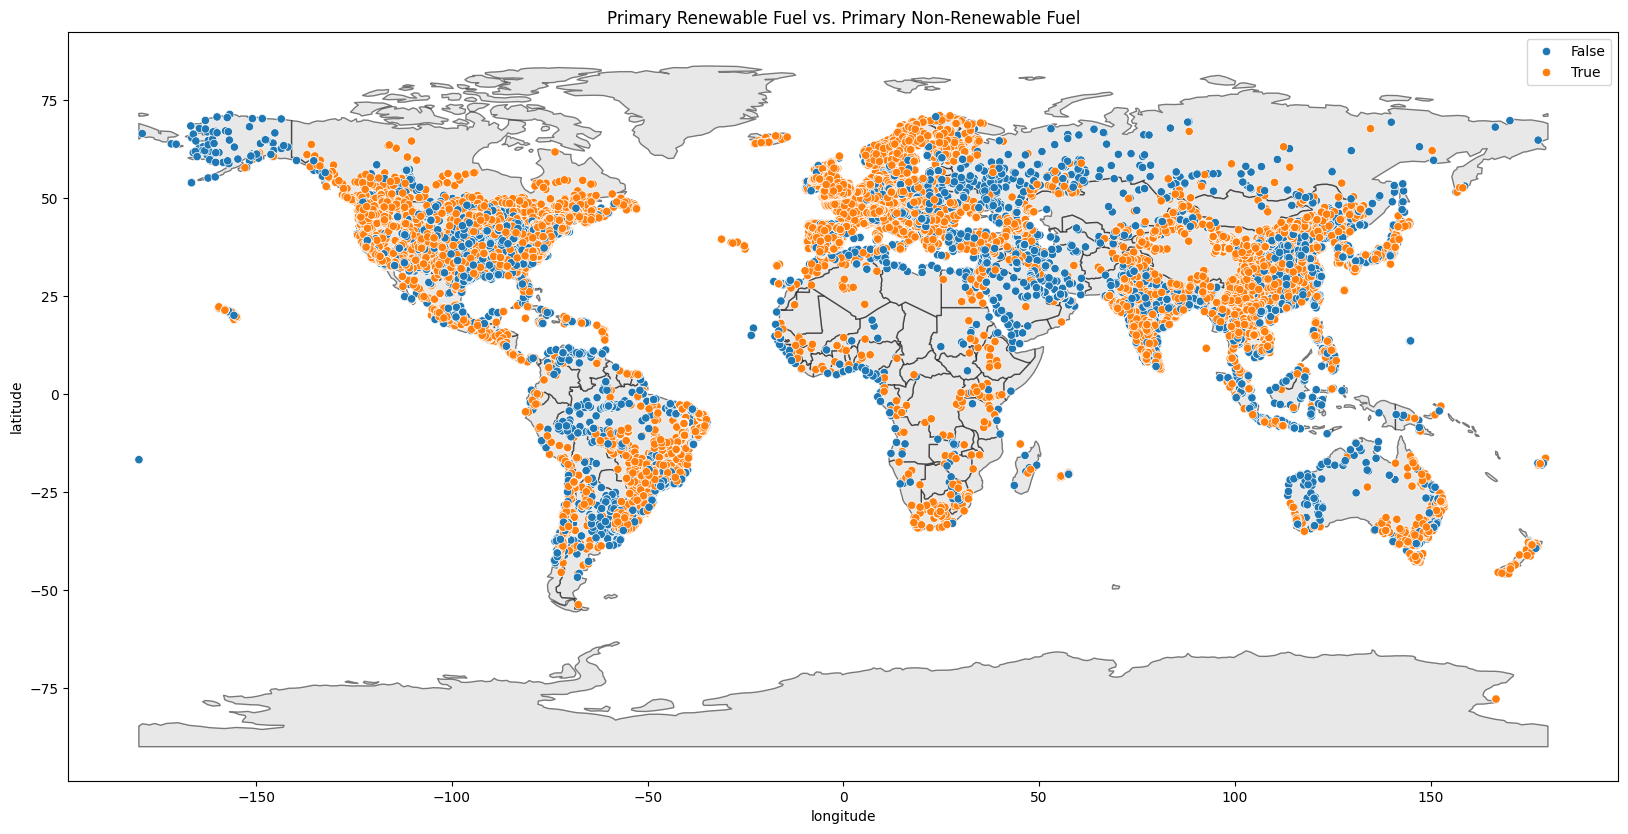

In [24]:
# plot plants that use reneable fuel as their primary source and those that do not
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)
sns.scatterplot(data= gpp_data, y="latitude",x="longitude", hue="is_renewable", legend="auto")
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Primary Renewable Fuel vs. Primary Non-Renewable Fuel')
plt.show()

Now we take explore the locations that utilize renewable fuel as secondary fuel, indicating possible options for further expansion.

In [25]:
poss_renewables = gpp_data[gpp_data['possible_renewable'] == True]
len(poss_renewables)

172

C:\Users\farrj\AppData\Local\Temp\ipykernel_32060\2044544474.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


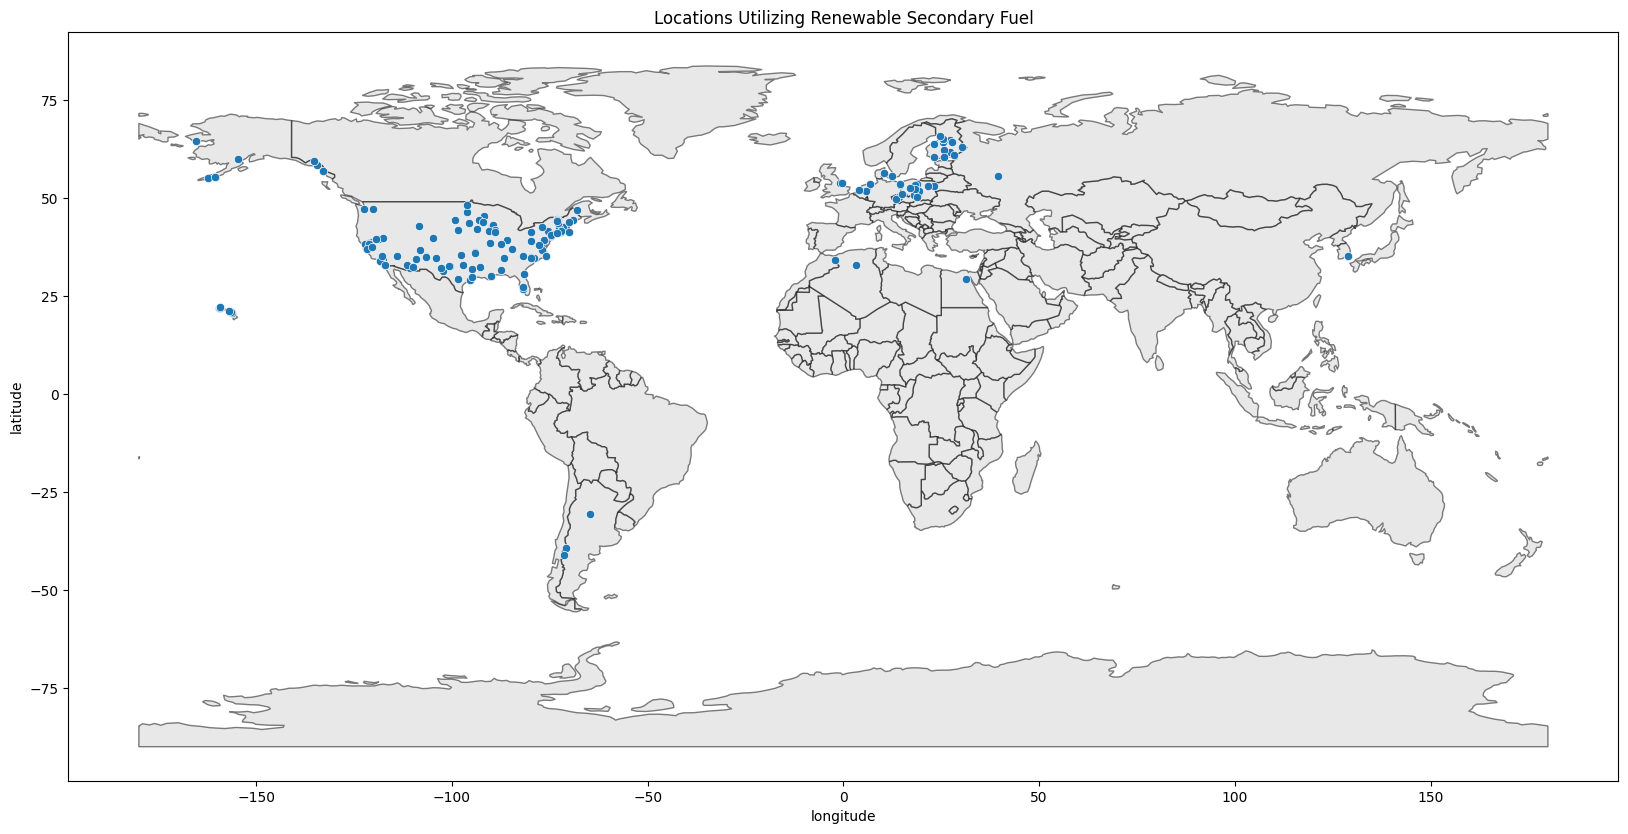

In [26]:
# plot the 172 plants using renewable fuel as their secondary fuel
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)


sns.scatterplot(data= poss_renewables, y="latitude",x="longitude", legend="auto")
#plt.legend(bbox_to_anchor=(1, 1))
plt.title('Locations Utilizing Renewable Secondary Fuel')
plt.show()

Places utilizing renewable resources as their secondary fuel source appear to largely be located within regions already using renewable resources as their primary source as well. Additionally, we noticed that these locations are also within developed or developing countries.

## Renewable vs. Non-renewable Splits by Country

As total MW generation by country does not give a whole lot of insight to opportunities, we decided to take a closer look at the break down of renewable vs non-renewable sources used for the top and bottom 10 producing countries.

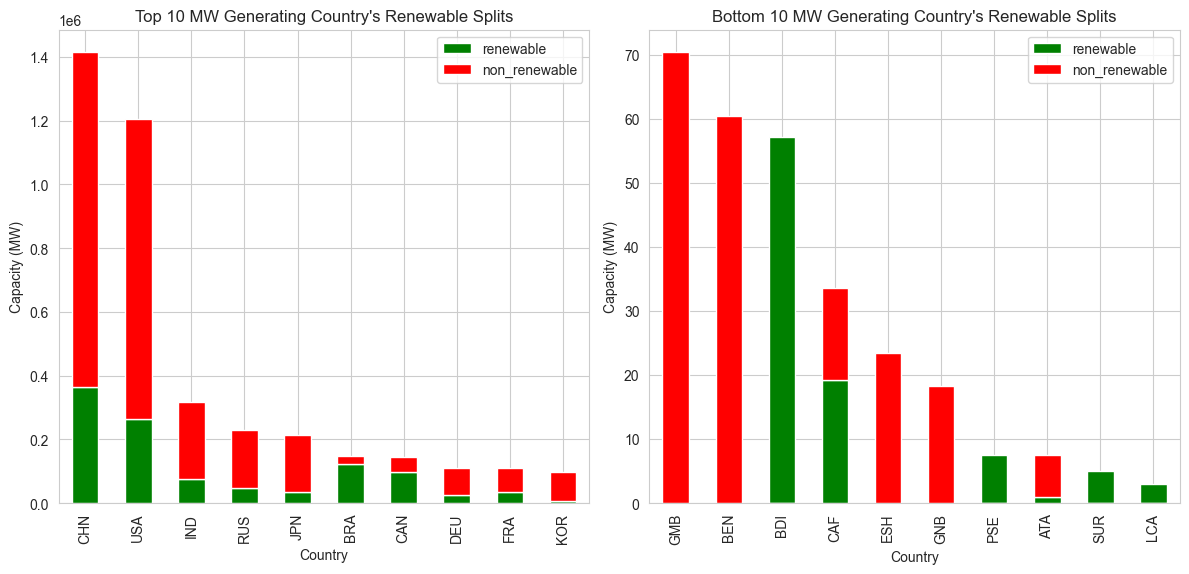

In [27]:
# plot renewable and non-renewable breakdown for top and bottom 10 producing countries
xtoplot_full = capacities["Country"]

data_splot_full = pd.DataFrame(index=xtoplot_full, columns=['renewable', 'non_renewable'])

#calculate splits of renewable vs. non-renewable
for country in xtoplot_full:
    temp = gpp_data[gpp_data["country"] == country]
    data_splot_full.loc[country, 'renewable'] = temp[temp["is_renewable"]]["capacity_mw"].sum()
    data_splot_full.loc[country, 'non_renewable'] = temp[~temp["is_renewable"]]["capacity_mw"].sum()
    data_splot_full.loc[country, 'country'] = country

sns.set_style("whitegrid")

fig1, ax1 = plt.subplots(1, 2, figsize=(12, 6))

# Plot the top 10 countries by MWs
data_splot_first_10 = data_splot_full.iloc[:10]
data_splot_first_10.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax1[0])
ax1[0].set_ylabel("Capacity (MW)")
ax1[0].set_title("Top 10 MW Generating Country's Renewable Splits")

# Plot the bottom 10 countries by MWs
data_splot_last_10 = data_splot_full.iloc[-10:]
data_splot_last_10.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax1[1])
ax1[1].set_ylabel("Capacity (MW)")
ax1[1].set_title("Bottom 10 MW Generating Country's Renewable Splits")

plt.tight_layout()
plt.show()

With the exception of Brazil and Canada, every country of the top 10 MW generating countries in the world has an energy portfolio with the majority of energy being generated by non-renewable resources.

Interestingly, 80% of the bottom 10 countries seem to have an energy portfolio that is exclusively renewable or exclusively non-renewable.

To visualize this better, let's look at renewable and non-renewable as a percentage of MW generation by country. We will also overlay HDI data to see if any pattern emerges. First, we will make a new dataframe with percentage information as well as HDI, population, and growth rate for future exploration.

In [30]:
#Create new dataframe with total capcity, % newable, % non-renewabel, HDI, Pop, and Growth %
percent_data = data_splot_full.copy()
temp = percent_data["non_renewable"] + percent_data["renewable"]
percent_data["renewable"] /= temp
percent_data["non_renewable"] /= temp
percent_data.head()

percent_data_melt = percent_data[:10]
percent_data_melt = pd.melt(percent_data_melt, id_vars=["country"])
percent_data_melt['country'] = pd.Categorical(percent_data_melt['country'], categories=xtoplot_full)
countryHDI = capacities[["Country", "Capacity (MW)", "HDI", "Population", "Growth Rate %"]]
percent_data_hdi_full = pd.merge(percent_data, countryHDI, left_index=True, right_on='Country', how='inner')

percent_data_hdi_full.drop(['Country', 'country'], axis=1, inplace=True)
percent_data_hdi_full

,renewable,non_renewable,Capacity (MW),HDI,Population,Growth Rate %
CHN,0.257828,0.742172,1415067.38,0.749,1387067142.857143,-0.458927
USA,0.219769,0.780231,1204638.05,0.933,328329953.0,-0.544102
IND,0.239683,0.760317,316088.546,0.638,1383112050.0,-0.983095
RUS,0.206504,0.793496,228220.05,0.826429,144163826.857143,-0.08924
JPN,0.157095,0.842905,215365.85,0.913857,127050571.428571,0.091311
...,...,...,...,...,...,...
GNB,0.0,1.0,18.237,0.473714,1834253.0,-2.127998
PSE,1.0,0.0,7.6,0.715143,4370926.285714,-1.987735
ATA,0.131579,0.868421,7.6,NaN,NaN,NaN
SUR,1.0,0.0,5.0,0.707286,581733.142857,-0.892442


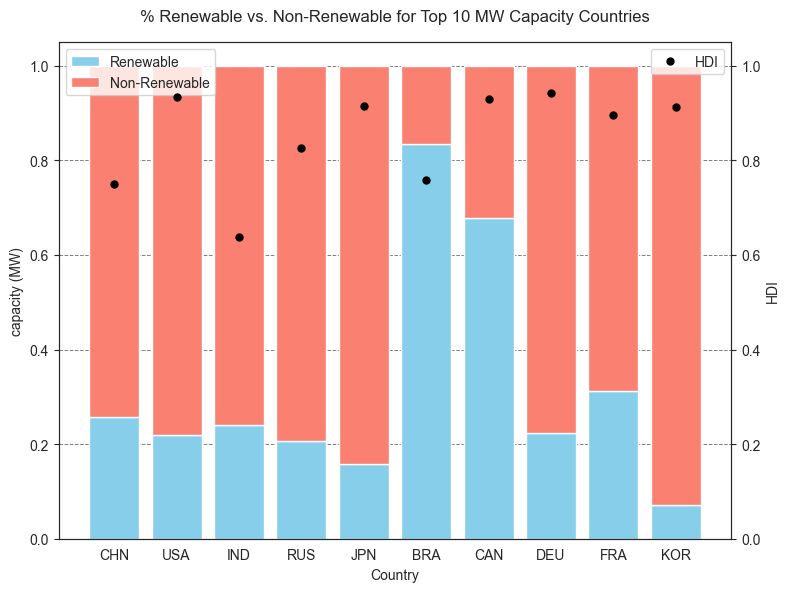

In [31]:
# plot renewable and non-renewable breakdown with HDI overlay
pastel_palette = sns.color_palette("pastel")

# Extract data for plotting
top_percent_data_hdi = percent_data_hdi_full[:10]
sns.set_style('white')

countries = top_percent_data_hdi.index
renewable = top_percent_data_hdi['renewable']
non_renewable = top_percent_data_hdi['non_renewable']
hdi = top_percent_data_hdi['HDI']

# Create stacked bar chart
fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.bar(countries, renewable, label='Renewable', color='skyblue')
ax1.bar(countries, non_renewable, bottom=renewable, label='Non-Renewable', color='salmon')

# Overlay HDI as points
ax2 = ax1.twinx()
ax2.plot(countries, hdi, marker='o', linestyle='', markersize=5, label='HDI', color='black')

# Set labels and legend
ax1.set_xlabel('Country')
ax1.set_ylabel('capacity (MW)')
ax2.set_ylabel('HDI')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylim(0,1.05)
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.grid(True, linestyle='--', color='gray', linewidth=0.7, axis='y')


# Show plot
plt.suptitle("% Renewable vs. Non-Renewable for Top 10 MW Capacity Countries")
plt.tight_layout()
plt.show()

In [32]:
# calculate mean renewable % with and w/out BRA and CAN
excludeCountries = ['BRA', 'CAN']
filteredTop = top_percent_data_hdi.drop(index=excludeCountries)
print(f"Mean renwable percentage of top ten MW generating countries: {round(top_percent_data_hdi['renewable'].mean()*100, 2)}%")
print(f"Mean renewable percentage of top ten countries excluding BRA and CAN: {round(filteredTop['renewable'].mean()*100, 2)}%")

Mean renwable percentage of top ten MW generating countries: 32.0%
Mean renewable percentage of top ten countries excluding BRA and CAN: 21.09%


With the exception of Brazil and Canada, the percenatge of renewable MegaWatts generated by these countries is below 40% of their total generation, with an average of 21%. If Brazil and Canada are included, the average percent renewable jumps up to approximately 32%.

## Correlation Check
At this point, we wanted to check the relationship of our data to see if there were any noticeable relationships worth exploring further. From the pairplot below, it does not appear that renewable energry percentage has any correlation to HDI, population, or any other category.

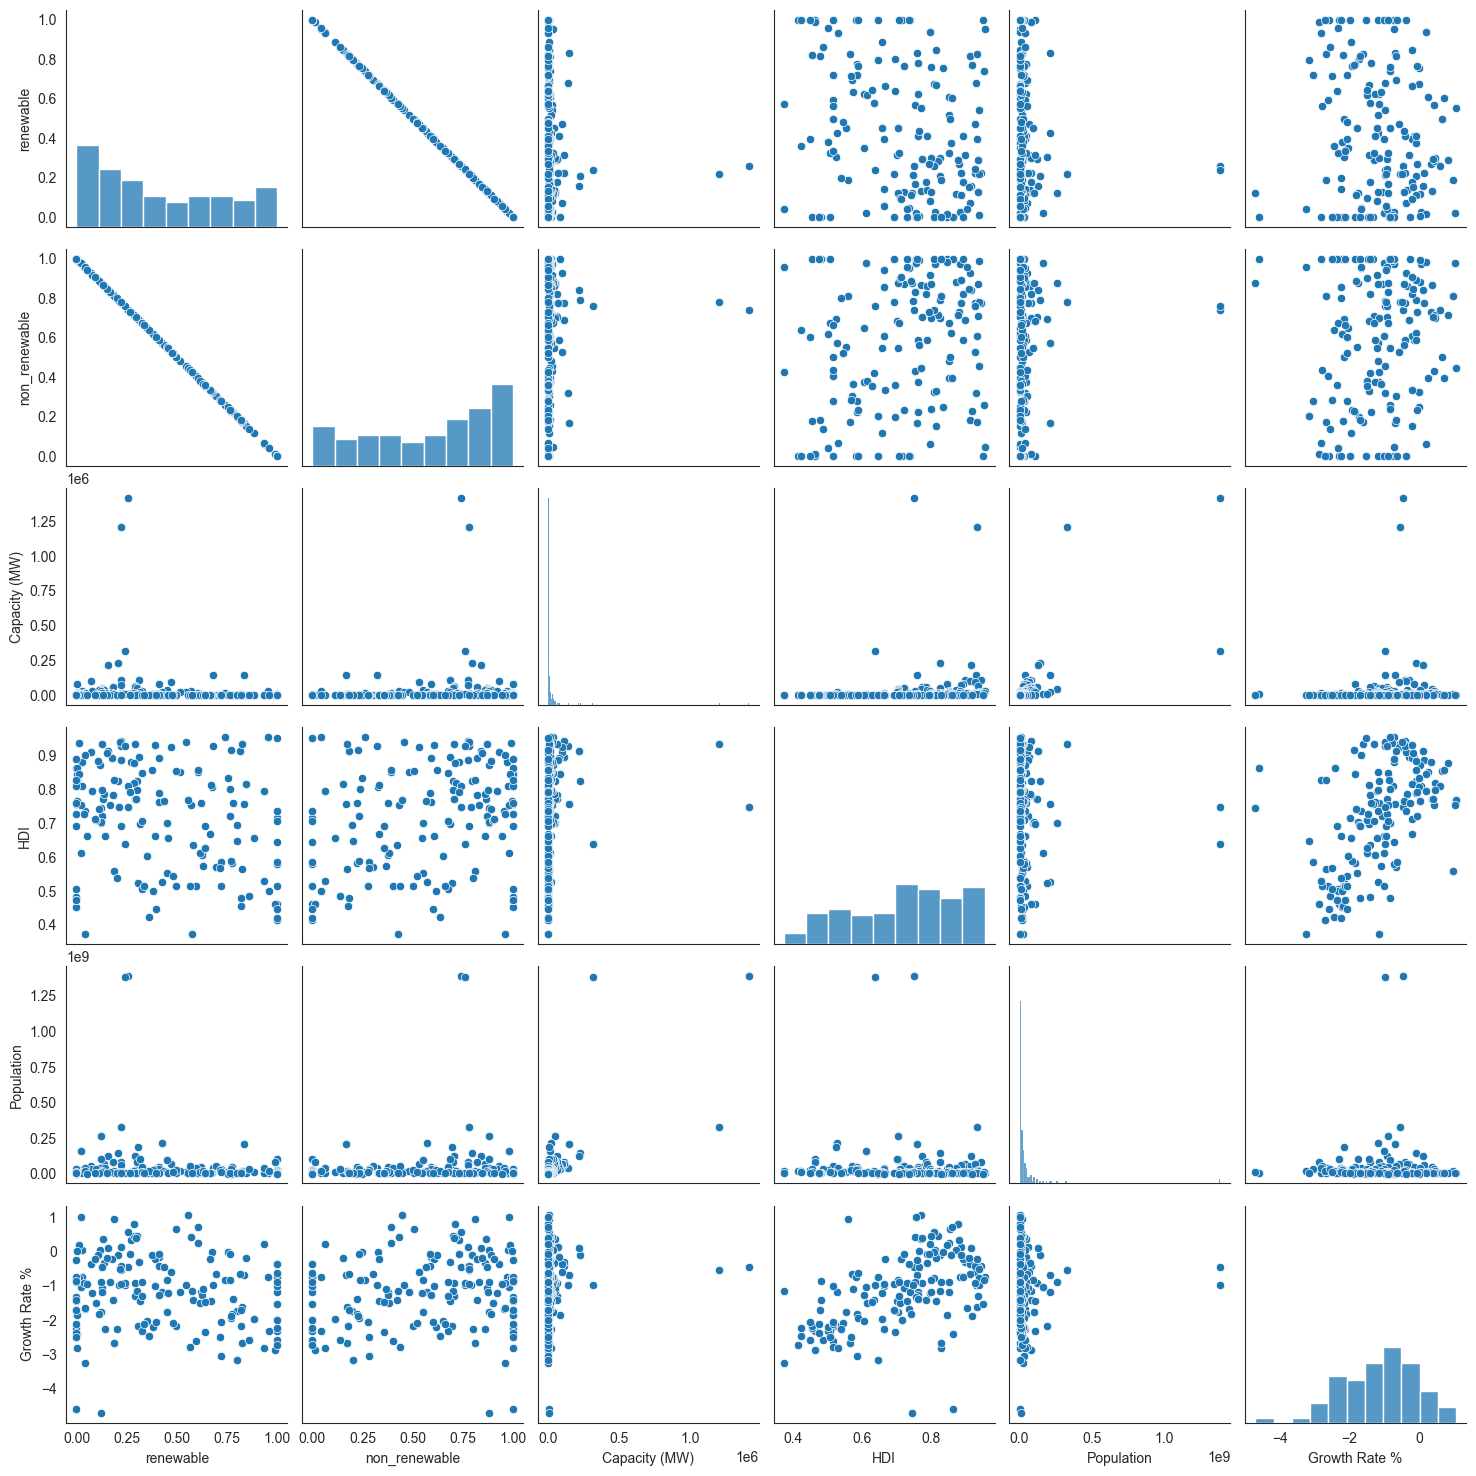

In [33]:
# plot pairplot
sns.pairplot(percent_data_hdi_full);

## Non-Renewable Generation by MW Only

It does not appear that there is any correlation between HDI, population, growth rate and renewable energy. HDI and growth rate appear to have a slight linear relationship, which makes sense with how that is calculated but does not impact what we are looking at. In general, we would expect HDI to have a relationship with non-renewable energy resources as developing countries tend to use more fossil fuel sources of energy as those have historically been cheaper and easier to implement. Because there does not appear to be a correlation, the largest opportunities will likely be where the most MW is currently generated by non-renewable resources or where the population per MW generated is the highest as that indicates a need for the construction of additional power plants.

We explore this briefly in the plots below.

In [34]:
#Calculate population per MW
percent_data_hdi_full["Pop_per_MW"] =  percent_data_hdi_full["Population"] / percent_data_hdi_full["Capacity (MW)"]

#Calculate non-renewable MW
percent_data_hdi_full['non_renewMW'] = percent_data_hdi_full['non_renewable']*percent_data_hdi_full["Capacity (MW)"]

#create smaller dataframes for graphing
topTenRatio = percent_data_hdi_full.sort_values(by="Pop_per_MW")[:10].reset_index()
bottomTenRatio = percent_data_hdi_full.sort_values(by="Pop_per_MW").dropna(axis=0,subset=['Pop_per_MW'])[-10:].reset_index()
topOpp = percent_data_hdi_full.sort_values(by="non_renewMW", ascending=False)[:10].reset_index()

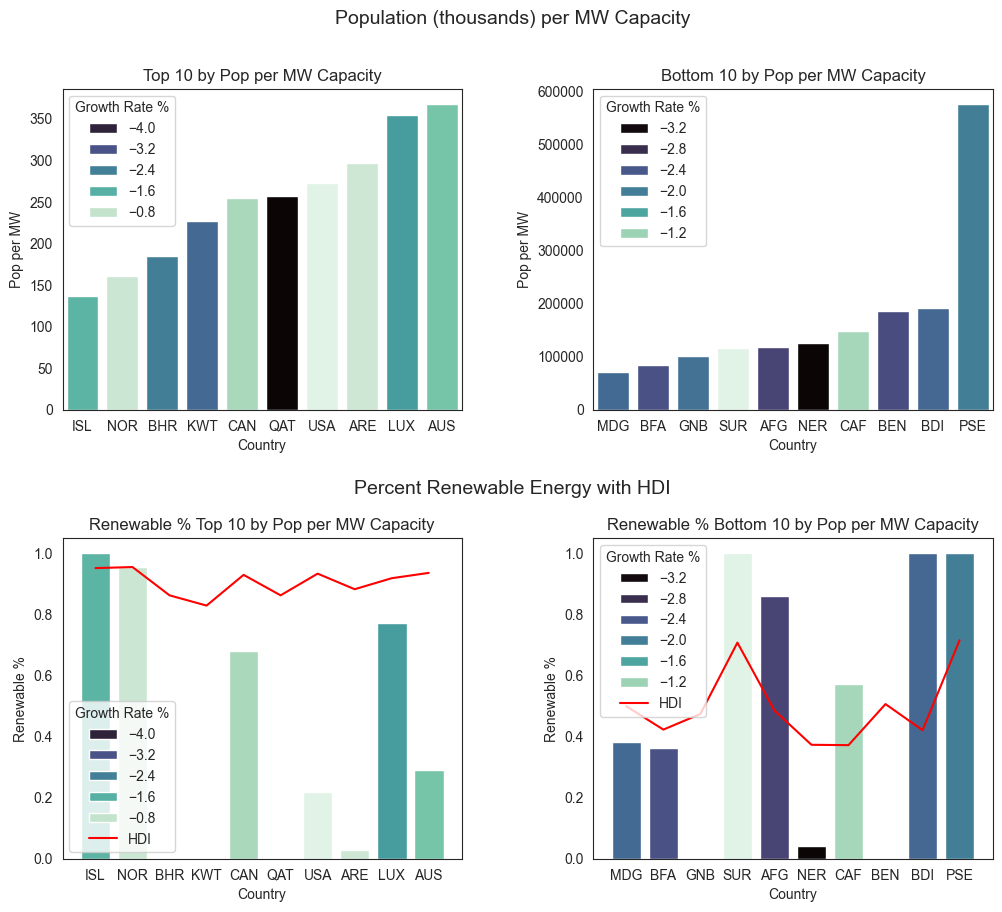

In [35]:
# plots with pop per mw, % renewable, and hdi (should we move this one above the pairplot?)

figR, axR = plt.subplots(2, 2, figsize=(12,10), gridspec_kw={'hspace': 0.4, 'wspace': 0.33})
#set up population per MW bar graph

sns.barplot(data=topTenRatio, x='index', y="Pop_per_MW", ax=axR[0, 0], hue='Growth Rate %', palette='mako')
sns.barplot(data=bottomTenRatio, x='index', y="Pop_per_MW", ax=axR[0, 1], hue='Growth Rate %', palette='mako')


#set up renewable % bar graph
sns.barplot(data=topTenRatio, x='index', y='renewable', ax=axR[1,0], hue='Growth Rate %', palette='mako')
sns.barplot(data=bottomTenRatio, x='index', y='renewable', ax=axR[1,1], hue='Growth Rate %', palette='mako')

#set up HDI overlay graph
sns.lineplot(data=topTenRatio, x='index', y='HDI', ax=axR[1,0], color='red', label='HDI')
sns.lineplot(data=bottomTenRatio, x='index', y='HDI', ax=axR[1,1], color='red', label='HDI')

#set up first row labels
axR[0, 0].set_title("Top 10 by Pop per MW Capacity")
axR[0, 1].set_title("Bottom 10 by Pop per MW Capacity")

axR[0, 0].set_xlabel("Country")
axR[0, 1].set_xlabel("Country")

axR[0, 0].set_ylabel("Pop per MW")
axR[0, 1].set_ylabel("Pop per MW")

#set up second row labels
axR[1, 0].set_title("Renewable % Top 10 by Pop per MW Capacity")
axR[1, 1].set_title("Renewable % Bottom 10 by Pop per MW Capacity")

axR[1, 0].set_xlabel("Country")
axR[1, 1].set_xlabel("Country")

axR[1, 0].set_ylabel("Renewable %")
axR[1, 1].set_ylabel("Renewable %")
axR[1, 0].legend(loc='lower left', title="Growth Rate %")
axR[1, 1].legend(title="Growth Rate %")


#create titles for each row, specify location
row_titles = ["Population (thousands) per MW Capacity", "Percent Renewable Energy with HDI"]
figR.text(0.5, 0.95, row_titles[0], ha='center', va='center', fontsize=14)
figR.text(0.5, 0.48, row_titles[1], ha='center', va='center', fontsize=14)

plt.show()


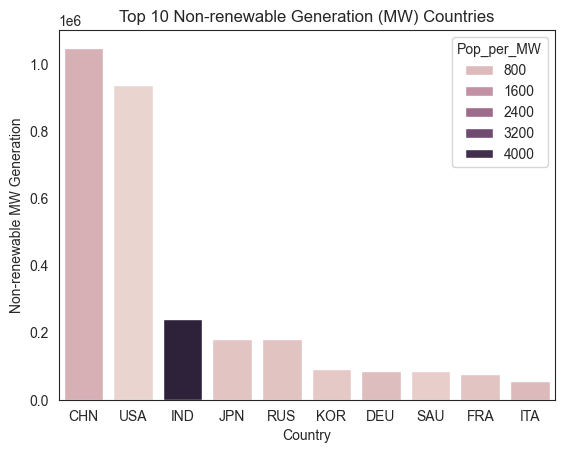

In [36]:
#Graph non-renewableMW
sns.barplot(data=topOpp, x='index', y="non_renewMW", hue='Pop_per_MW')
plt.xlabel('Country')
plt.ylabel('Non-renewable MW Generation')
plt.title('Top 10 Non-renewable Generation (MW) Countries');

The graph above shows that, as expected, the US and China generate the most non-renewable megawattage and therefore have an opportunity to impact global renewable energy generation the most. Interestingly, India has the highest population to megawatt ratio by far of the top ten MW generating countries. This indicates that India may also have a large opportunity to invest in more renewable power plants as they grow their grid. However, we recognize that there may be many complicating factors including, but not limited to, politics, industry knowledge, and investment costs. 

## Final Thoughts

While our exploration into HDI and its possible affect on type of fuel source yielded no correlation, it was an interesting excercise. We gathered a more informative result from a deeper look at the dataset itself. In future project, it may be beneficial to look into if increasing percent of renewable sources has any affect on the change in HDI year over year.

The current use of non-renewable fuel sources is deeply entrenched within our society. The two nations (USA and China) that produce the most energy, far outproduce any other nation and do so with largely non-rewnewable resources. While the impact of developed countries switching to renewable sources will be the greatest, opportunities also exist for smaller countries to develop in a more sustainable way. Unfortunately, renewable power sources are generally more expensive and/or less reliable and thus may be a heavy burden to place on developing countries when their net impact is a small drop in the ocean of power generation.

Meaningful impact on areas such as climate change will need to come from developed nations already leading the way in energy production. These countries, typically with additional resources to do so, must make it a priority to transition from non-rewable fuel sources to renewable fuel sources and lead the world stage in pioneering a better, more sustainable future for all.